# 1 

## PART 1

### Use the bwght dataset from the Wooldridge python module to answer the following question.

In [1]:
import numpy as np
import wooldridge as woo
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf

In [2]:
women = woo.data("bwght")
women.head()

,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
0,13.5,16.5,122.300003,109,12.0,12.0,1,1,1,0,4.691348,6.8125,0.0,2.602690
1,7.5,16.5,122.300003,133,6.0,12.0,2,1,0,0,4.890349,8.3125,0.0,2.014903
2,0.5,16.5,122.300003,129,NaN,12.0,2,0,0,0,4.859812,8.0625,0.0,-0.693147
3,15.5,16.5,122.300003,126,12.0,12.0,2,1,0,0,4.836282,7.8750,0.0,2.740840
4,27.5,16.5,122.300003,134,14.0,12.0,2,1,1,0,4.897840,8.3750,0.0,3.314186


### How many women are in the sample? How many report smoking during pregnancy?

In [3]:
print("There are", women.shape[0], "women in the sample")

There are 1388 women in the sample


In [4]:
women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   faminc    1388 non-null   float64
 1   cigtax    1388 non-null   float64
 2   cigprice  1388 non-null   float64
 3   bwght     1388 non-null   int64  
 4   fatheduc  1192 non-null   float64
 5   motheduc  1387 non-null   float64
 6   parity    1388 non-null   int64  
 7   male      1388 non-null   int64  
 8   white     1388 non-null   int64  
 9   cigs      1388 non-null   int64  
 10  lbwght    1388 non-null   float64
 11  bwghtlbs  1388 non-null   float64
 12  packs     1388 non-null   float64
 13  lfaminc   1388 non-null   float64
dtypes: float64(9), int64(5)
memory usage: 151.9 KB


In [5]:
women_cigs = women.cigs==0
women_smoking = women.shape[0]-sum(women_cigs)
print(women_smoking, "women reported smoking during pregnancy at least one cigarette per day")

212 women reported smoking during pregnancy at least one cigarette per day


### Generate a table of summary statistics for the dataframe. What is the average number of cigarettes smoked in a day? Is the mean a good measure of the typical women’s smoking habits? Explain.

In [6]:
women.describe()

,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
count,1388.000000,1388.000000,1388.000000,1388.000000,1192.000000,1387.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,29.026657,19.552954,130.559006,118.699568,13.186242,12.935833,1.632565,0.520893,0.784582,2.087176,4.760031,7.418723,0.104359,3.071271
std,18.739285,7.795598,10.244485,20.353964,2.745985,2.376728,0.894027,0.499743,0.411260,5.972688,0.190662,1.272123,0.298634,0.918065
min,0.500000,2.000000,103.800003,23.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,3.135494,1.437500,0.000000,-0.693147
25%,14.500000,15.000000,122.800003,107.000000,12.000000,12.000000,1.000000,0.000000,1.000000,0.000000,4.672829,6.687500,0.000000,2.674149
50%,27.500000,20.000000,130.800003,120.000000,12.000000,12.000000,1.000000,1.000000,1.000000,0.000000,4.787492,7.500000,0.000000,3.314186
75%,37.500000,26.000000,137.000000,132.000000,16.000000,14.000000,2.000000,1.000000,1.000000,0.000000,4.882802,8.250000,0.000000,3.624341
max,65.000000,38.000000,152.500000,271.000000,18.000000,18.000000,6.000000,1.000000,1.000000,50.000000,5.602119,16.937500,2.500000,4.174387


The average number we get from the column "cigs" is 2.087176. However, this is not a good measure of typical women's smiking habit as the women in the sample were pregnant, thus, the information is biased. We can understand that as most of the anserws were 0.

### Find the average fatheduc in the sample. Why are only 1,192 observations used to compute this average?

In [7]:
print("The average fatheduc is", women["fatheduc"].mean())

The average fatheduc is 13.186241610738255


There are only 1,192 observations because the other values were missing. As from the table above: "fatheduc  1192 non-null   float64". That means only 1192 values were not NaN.


## PART 2

### Generate two different histograms of bwght using Sturge’s and FD binning methods. What are the strengths and weaknesses of each method?

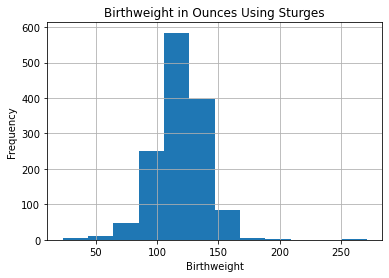

In [8]:
plt.hist(women.bwght, alpha=1, bins="sturges")
plt.title("Birthweight in Ounces Using Sturges")
plt.xlabel("Birthweight")
plt.ylabel("Frequency")
plt.grid()
plt.show()

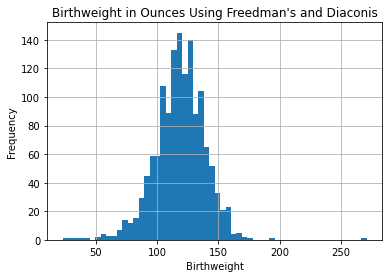

In [9]:
plt.hist(women.bwght, alpha=1, bins="fd")
plt.title("Birthweight in Ounces Using Freedman's and Diaconis")
plt.xlabel("Birthweight")
plt.ylabel("Frequency")
plt.grid()
plt.show()

STURGES | Pros: useful for not too large and not too small datasets, and optimal for normal distribution | Cons: the number of bins is too low for more complex distribution, so the data presentation might be biased as you cannot understand perfectly the real distribution because of the minimal number of bins. Same when the sample is too large.

FD | Pros: great with complex data set and allows the representation of a wide array of distributions and their skews or outliers. Hence, it adapts more to the sample | Cons: it might need to be adjusted for too large or small samples.

### Create a histogram of bwght and overlay a density curve.

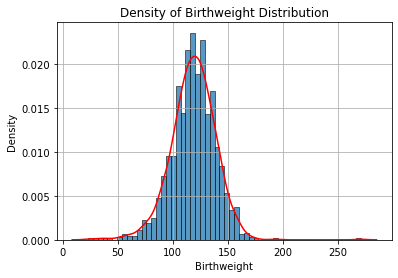

In [10]:
sns.histplot(women.bwght, stat="density")
sns.kdeplot(women.bwght, color="red")
plt.title("Density of Birthweight Distribution")
plt.xlabel("Birthweight")
plt.ylabel("Density")
plt.grid()
plt.show()

### Using a q-q plot, do you believe bwght is approximately normally distributed? Why are why not?

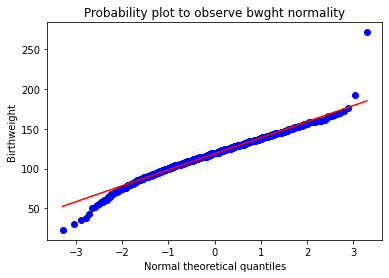

In [11]:
stats.probplot(women.bwght, dist="norm", plot=plt)
plt.title("Probability plot to observe bwght normality")
plt.xlabel("Normal theoretical quantiles")
plt.ylabel("Birthweight")
plt.show()

The dataset "bwght" does not look normal, the line formed by each observation is deviated on the negative part. 

### Create a boxplot conditioning on whether or not the mother was a smoker. Do you observe any differences? If so, what?

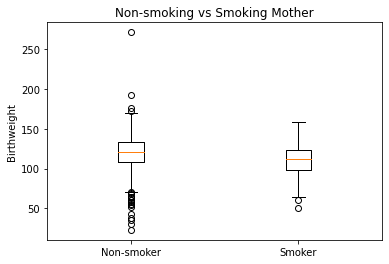

In [12]:
data = [women[women.cigs==0].bwght, women[women.cigs>0].bwght]
plt.boxplot(data)
plt.title("Non-smoking vs Smoking Mother")
plt.xticks([1,2], ["Non-smoker", "Smoker"])
plt.ylabel("Birthweight")
plt.show()

When the mother is a non-smoker, we have a lot of outliers. This means the birthweigh is still variable even if the mother does not smoke. This might be due to the fact that we have a lot more observations of non-smoking mothers.

## PART 3

### Estimate the parameters for the following simple regression: bwˆght = βˆ0 + βˆ1cigs, report the intercept and slope. What do these tell you about the association between cigarette use and birth weight?

In [13]:
regr = smf.ols('bwght ~ cigs', data=women)
result = regr.fit()
result.params

Intercept    119.771900
cigs          -0.513772
dtype: float64

Let's try it manually to be more sure.

In [14]:
x = women.cigs
y = women.bwght
cov_xy = np.cov(x,y)[1,0]
var_x = np.var(x, ddof=1)
b1 = cov_xy/var_x
b0 = np.mean(y)-b1*np.mean(x)

print("The model is: bwght_hat =", b0, b1, "* cigs")

The model is: bwght_hat = 119.77190039834969 -0.5137720928233933 * cigs


We can observe that if the number of cigarettes smoked per day while a woman is pregnant increases of a unit, the weight at birth of a child decreases of 0.514 ounces. 

### What is the predicted value of birthweight when cigs = 0? When cigs = 3?

In [15]:
bwght_hat_0 = b0+b1*0
print("When cigs=0, birthweight predicted value is", bwght_hat_0)

When cigs=0, birthweight predicted value is 119.77190039834969


In [16]:
bwght_hat_3 = b0+b1*3
print("When cigs=3, birthweight predicted value is", bwght_hat_3)

When cigs=3, birthweight predicted value is 118.23058411987951


### Verify the residuals of this regression sum (approximately) to zero.

In [17]:
# mean of the residuals
result.resid.mean()

2.1582479639514282e-14

In [18]:
bwght_hat = b0 + b1*women.cigs
u_hat = women.bwght - bwght_hat
u_hat

0      -10.7719
1       13.2281
2        9.2281
3        6.2281
4       14.2281
         ...   
1383    -9.7719
1384    26.2281
1385    15.2281
1386    -1.7719
1387    -8.7719
Length: 1388, dtype: float64

In [19]:
# sum of the residuals approximately to zero
u_hat.sum()

5.8548721426632255e-12

In [20]:
result.resid.sum()

2.2112089936854318e-11

In [21]:
result.resid

0      -10.7719
1       13.2281
2        9.2281
3        6.2281
4       14.2281
         ...   
1383    -9.7719
1384    26.2281
1385    15.2281
1386    -1.7719
1387    -8.7719
Length: 1388, dtype: float64

Despite we receive two different values - due to approximation - when using the manual method, the sum approximate to 0.

### Using a scatter plot, show the observed values against the values predicted by a regression.

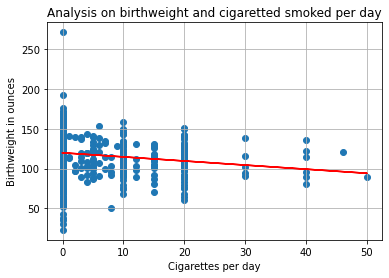

In [22]:
plt.scatter(women.cigs, women.bwght)
plt.plot(women.cigs, result.fittedvalues, color = "red")
plt.title("Analysis on birthweight and cigaretted smoked per day")
plt.ylabel("Birthweight in ounces")
plt.xlabel("Cigarettes per day")
plt.grid()